In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split #  import library for train split

In [2]:
df = pd.read_csv("Datasets/train.csv")

In [3]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["name","cabin","ticket","sex","embarked"],axis=1,inplace=True)

In [5]:
df.fillna(0,inplace=True)

In [6]:
df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [7]:
# method 1: syntax for train split

x_train,x_test,y_train,y_test=train_test_split(df.drop(["survived"],axis=1),df["survived"],test_size=0.3,random_state=21)

In [8]:
x_train

,pclass,age,sibsp,parch,fare
241,3,0.0,1,0,15.5000
734,2,23.0,0,0,13.0000
581,1,39.0,1,1,110.8833
456,1,65.0,0,0,26.5500
118,1,24.0,0,1,247.5208
...,...,...,...,...,...
368,3,0.0,0,0,7.7500
48,3,0.0,2,0,21.6792
772,2,57.0,0,0,10.5000
824,3,2.0,4,1,39.6875


In [9]:
# Method 2 : train split

x=df.drop(["survived"],axis=1)

In [10]:
x

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,0.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [11]:
# Method 2: train split

y=df["survived"]

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [13]:
#Method 2 : syntax for train split

x_train,x_test,y_train,y_test=train_test_split(x,y)

In [14]:
x_train

,pclass,age,sibsp,parch,fare
216,3,27.0,0,0,7.9250
400,3,39.0,0,0,7.9250
48,3,0.0,2,0,21.6792
336,1,29.0,1,0,66.6000
23,1,28.0,0,0,35.5000
...,...,...,...,...,...
759,1,33.0,0,0,86.5000
495,3,0.0,0,0,14.4583
203,3,45.5,0,0,7.2250
868,3,0.0,0,0,9.5000


In [15]:
s=StandardScaler()

In [16]:
s.fit_transform(x_train)  # for train(data that gives to ML) data
s.transform(x_test)       # for test data

array([[ 0.81526314,  0.06658222, -0.48644242, -0.47636455, -0.48081361],
       [-1.59445268, -1.3670842 , -0.48644242, -0.47636455,  0.37165387],
       [ 0.81526314, -1.3670842 , -0.48644242, -0.47636455, -0.47734022],
       ...,
       [-0.38959477, -1.3670842 , -0.48644242, -0.47636455, -0.37561971],
       [-0.38959477,  0.49668214,  0.40138145, -0.47636455, -0.02389898],
       [-1.59445268,  1.32820866, -0.48644242, -0.47636455,  0.05450024]])

In [17]:
x_train_scale=s.fit_transform(x_train)
x_test_scale=s.transform(x_test)

In [18]:
x_train_scale

array([[ 0.81526314,  0.18127553, -0.48644242, -0.47636455, -0.46344669],
       [ 0.81526314,  0.86943541, -0.48644242, -0.47636455, -0.46344669],
       [ 0.81526314, -1.3670842 ,  1.28920532, -0.47636455, -0.19045465],
       ...,
       [ 0.81526314,  1.24218868, -0.48644242, -0.47636455, -0.47734022],
       [ 0.81526314, -1.3670842 , -0.48644242, -0.47636455, -0.43218624],
       [ 0.81526314, -1.3670842 , -0.48644242, -0.47636455, -0.46642388]])

In [19]:
x_test_scale

array([[ 0.81526314,  0.06658222, -0.48644242, -0.47636455, -0.48081361],
       [-1.59445268, -1.3670842 , -0.48644242, -0.47636455,  0.37165387],
       [ 0.81526314, -1.3670842 , -0.48644242, -0.47636455, -0.47734022],
       ...,
       [-0.38959477, -1.3670842 , -0.48644242, -0.47636455, -0.37561971],
       [-0.38959477,  0.49668214,  0.40138145, -0.47636455, -0.02389898],
       [-1.59445268,  1.32820866, -0.48644242, -0.47636455,  0.05450024]])

In [20]:
s.get_feature_names_out()   # for get column names

array(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

In [21]:
columns = s.get_feature_names_out()  # store in variable

In [22]:
df_T = pd.DataFrame(x_train_scale,columns = columns)  # store in dataframe

In [23]:
# for get scaling detail 
# std must be "1"
# mean must be "0"

df_T.describe()

,pclass,age,sibsp,parch,fare
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-1.588882e-16,-3.058099e-17,-2.659217e-18,4.520669e-17,6.648042e-17
std,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00
min,-1.594453e+00,-1.367084e+00,-4.864424e-01,-4.763646e-01,-6.207413e-01
25%,-3.895948e-01,-1.037341e+00,-4.864424e-01,-4.763646e-01,-4.635916e-01
50%,8.152631e-01,6.658222e-02,-4.864424e-01,-4.763646e-01,-3.378263e-01
75%,8.152631e-01,6.400488e-01,4.013814e-01,-4.763646e-01,-2.530421e-02
max,8.152631e-01,2.704528e+00,6.616149e+00,7.100100e+00,9.547919e+00


In [24]:
np.round(df_T.describe(),1)  # for get scaling in round of 1

,pclass,age,sibsp,parch,fare
count,668.0,668.0,668.0,668.0,668.0
mean,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.6,-1.4,-0.5,-0.5,-0.6
25%,-0.4,-1.0,-0.5,-0.5,-0.5
50%,0.8,0.1,-0.5,-0.5,-0.3
75%,0.8,0.6,0.4,-0.5,-0.0
max,0.8,2.7,6.6,7.1,9.5


Text(0.5, 1.0, 'After')

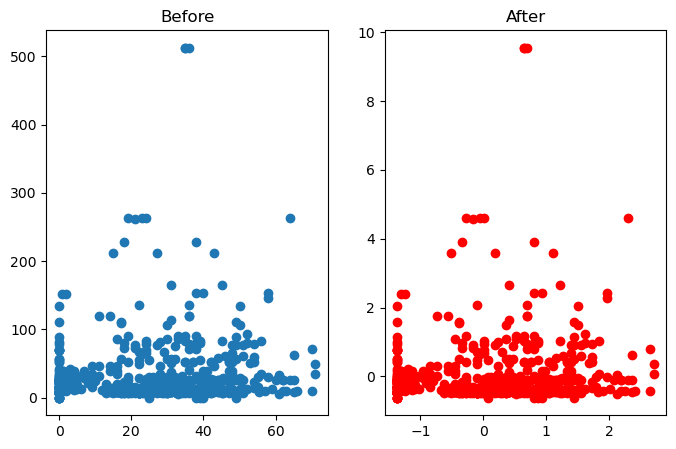

In [55]:
#This is simply a visualization method used to compare the data before and after a scaling transformation.

fig,(a1 , a2) = plt.subplots(ncols = 2 , figsize = (8 , 5))  # syntax for subplot
a1.scatter(x_train["age"], x_train["fare"])                  # graph of train
a1.set_title("Before")                                      
a2.scatter(df_T["age"], df_T["fare"] , color = "red")         # graph of test or standerd scaler                  
a2.set_title("After")

# MinMax Method :

In [59]:
MM = MinMaxScaler()

In [27]:
MM.fit_transform(x_train)
MM.transform(x_test)

array([[1.        , 0.35211268, 0.        , 0.        , 0.01376068],
       [0.        , 0.        , 0.        , 0.        , 0.0975935 ],
       [1.        , 0.        , 0.        , 0.        , 0.01410226],
       ...,
       [0.5       , 0.        , 0.        , 0.        , 0.02410559],
       [0.5       , 0.45774648, 0.125     , 0.        , 0.05869429],
       [0.        , 0.66197183, 0.        , 0.        , 0.06640418]])

In [28]:
x_train_scale_1 = MM.fit_transform(x_train)
x_test_scale_1 = MM.transform(x_test)

In [29]:
x_train_scale_1

array([[1.        , 0.38028169, 0.        , 0.        , 0.01546857],
       [1.        , 0.54929577, 0.        , 0.        , 0.01546857],
       [1.        , 0.        , 0.25      , 0.        , 0.04231498],
       ...,
       [1.        , 0.64084507, 0.        , 0.        , 0.01410226],
       [1.        , 0.        , 0.        , 0.        , 0.01854277],
       [1.        , 0.        , 0.        , 0.        , 0.01517579]])

In [30]:
x_test_scale_1

array([[1.        , 0.35211268, 0.        , 0.        , 0.01376068],
       [0.        , 0.        , 0.        , 0.        , 0.0975935 ],
       [1.        , 0.        , 0.        , 0.        , 0.01410226],
       ...,
       [0.5       , 0.        , 0.        , 0.        , 0.02410559],
       [0.5       , 0.45774648, 0.125     , 0.        , 0.05869429],
       [0.        , 0.66197183, 0.        , 0.        , 0.06640418]])

In [31]:
MM.get_feature_names_out()

array(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

In [32]:
columns1 = MM.get_feature_names_out()

In [33]:
df_T1 = pd.DataFrame(x_train_scale_1 , columns = columns)

In [34]:
df_T1.describe()

,pclass,age,sibsp,parch,fare
count,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.661677,0.335760,0.068488,0.062874,0.061045
std,0.415298,0.245787,0.140899,0.132087,0.098415
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.080986,0.000000,0.000000,0.015454
50%,1.000000,0.352113,0.000000,0.000000,0.027822
75%,1.000000,0.492958,0.125000,0.000000,0.058556
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
np.round(df_T1.describe(),1)

,pclass,age,sibsp,parch,fare
count,668.0,668.0,668.0,668.0,668.0
mean,0.7,0.3,0.1,0.1,0.1
std,0.4,0.2,0.1,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0
25%,0.5,0.1,0.0,0.0,0.0
50%,1.0,0.4,0.0,0.0,0.0
75%,1.0,0.5,0.1,0.0,0.1
max,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'After')

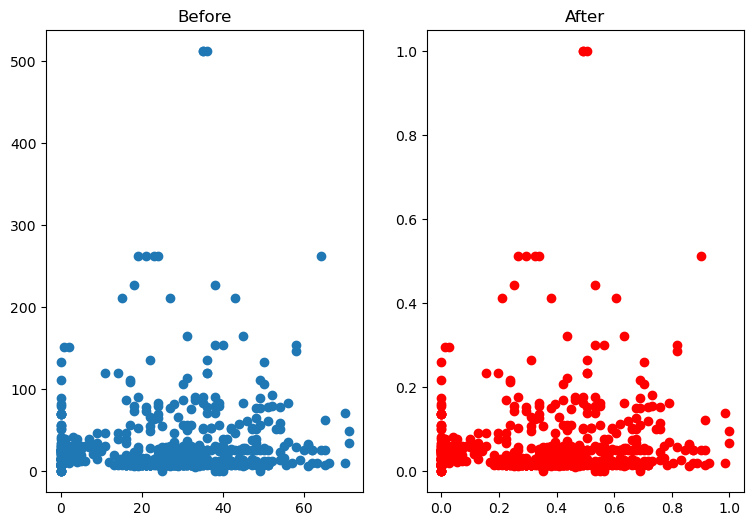

In [36]:
fig , (a1,a2) = plt.subplots(ncols = 2 , figsize= (9,6))
a1.scatter(x_train["age"], x_train["fare"])
a1.set_title("Before")
a2.scatter(df_T1["age"],df_T1["fare"] , color = "red")
a2.set_title("After")

# Max Method : 

In [58]:
MA = MaxAbsScaler()

In [38]:
MA.fit_transform(x_train)
MA.transform(x_test)

array([[1.        , 0.35211268, 0.        , 0.        , 0.01376068],
       [0.33333333, 0.        , 0.        , 0.        , 0.0975935 ],
       [1.        , 0.        , 0.        , 0.        , 0.01410226],
       ...,
       [0.66666667, 0.        , 0.        , 0.        , 0.02410559],
       [0.66666667, 0.45774648, 0.125     , 0.        , 0.05869429],
       [0.33333333, 0.66197183, 0.        , 0.        , 0.06640418]])

In [39]:
x_train_scale_2 = MA.fit_transform(x_train)
x_test_scale_2 = MA.transform(x_test)

In [40]:
MA.get_feature_names_out()

array(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

In [41]:
columns = MA.get_feature_names_out()

In [42]:
df_T2 = pd.DataFrame(x_train_scale_2 , columns = columns)

In [43]:
df_T2.describe()

,pclass,age,sibsp,parch,fare
count,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.774451,0.335760,0.068488,0.062874,0.061045
std,0.276865,0.245787,0.140899,0.132087,0.098415
min,0.333333,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.080986,0.000000,0.000000,0.015454
50%,1.000000,0.352113,0.000000,0.000000,0.027822
75%,1.000000,0.492958,0.125000,0.000000,0.058556
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
np.round(df_T2.describe(),1)

,pclass,age,sibsp,parch,fare
count,668.0,668.0,668.0,668.0,668.0
mean,0.8,0.3,0.1,0.1,0.1
std,0.3,0.2,0.1,0.1,0.1
min,0.3,0.0,0.0,0.0,0.0
25%,0.7,0.1,0.0,0.0,0.0
50%,1.0,0.4,0.0,0.0,0.0
75%,1.0,0.5,0.1,0.0,0.1
max,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'after')

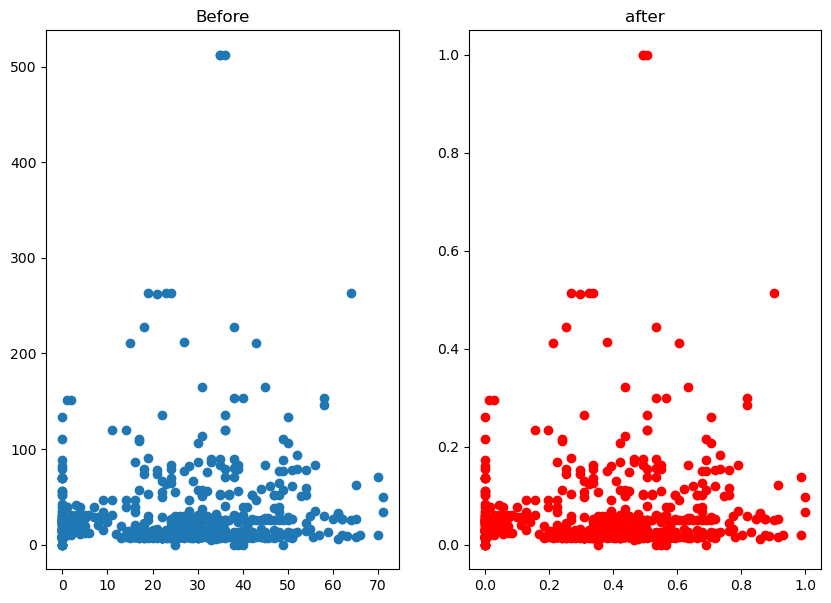

In [45]:
fig,(a1,a2) = plt.subplots( ncols = 2 , figsize = (10,7))
a1.scatter(x_train["age"], x_train["fare"])
a1.set_title("Before")
a2.scatter(df_T2["age"],df_T2["fare"] , color = "red")
a2.set_title("after")

# RobustScaler Method :

In [57]:
R = RobustScaler()

In [47]:
R.fit_transform(x_train)
R.transform(x_test)

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.32624093],
       [-2.        , -0.85470085,  0.        ,  0.        ,  1.61875575],
       [ 0.        , -0.85470085,  0.        ,  0.        , -0.31831603],
       ...,
       [-1.        , -0.85470085,  0.        ,  0.        , -0.0862297 ],
       [-1.        ,  0.25641026,  1.        ,  0.        ,  0.71625918],
       [-2.        ,  0.75213675,  0.        ,  0.        ,  0.89513547]])

In [48]:
x_train_scale_3 = R.fit_transform(x_train)
x_test_scale_3 = R.transform(x_test)

In [49]:
R.get_feature_names_out()

array(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

In [50]:
columns = R.get_feature_names_out()

In [51]:
df_T3 = pd.DataFrame(x_train_scale_3 , columns = columns)

In [52]:
df_T3.describe()

,pclass,age,sibsp,parch,fare
count,668.000000,668.000000,668.000000,668.000000,6.680000e+02
mean,-0.676647,-0.039694,0.547904,0.377246,7.707873e-01
std,0.830595,0.596611,1.127194,0.792519,2.283318e+00
min,-2.000000,-0.854701,0.000000,0.000000,-6.455011e-01
25%,-1.000000,-0.658120,0.000000,0.000000,-2.869470e-01
50%,0.000000,0.000000,0.000000,0.000000,4.076600e-17
75%,0.000000,0.341880,1.000000,0.000000,7.130530e-01
max,0.000000,1.572650,8.000000,6.000000,2.255540e+01


In [53]:
np.round(df_T3.describe(),1)

,pclass,age,sibsp,parch,fare
count,668.0,668.0,668.0,668.0,668.0
mean,-0.7,-0.0,0.5,0.4,0.8
std,0.8,0.6,1.1,0.8,2.3
min,-2.0,-0.9,0.0,0.0,-0.6
25%,-1.0,-0.7,0.0,0.0,-0.3
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.3,1.0,0.0,0.7
max,0.0,1.6,8.0,6.0,22.6


Text(0.5, 1.0, 'After')

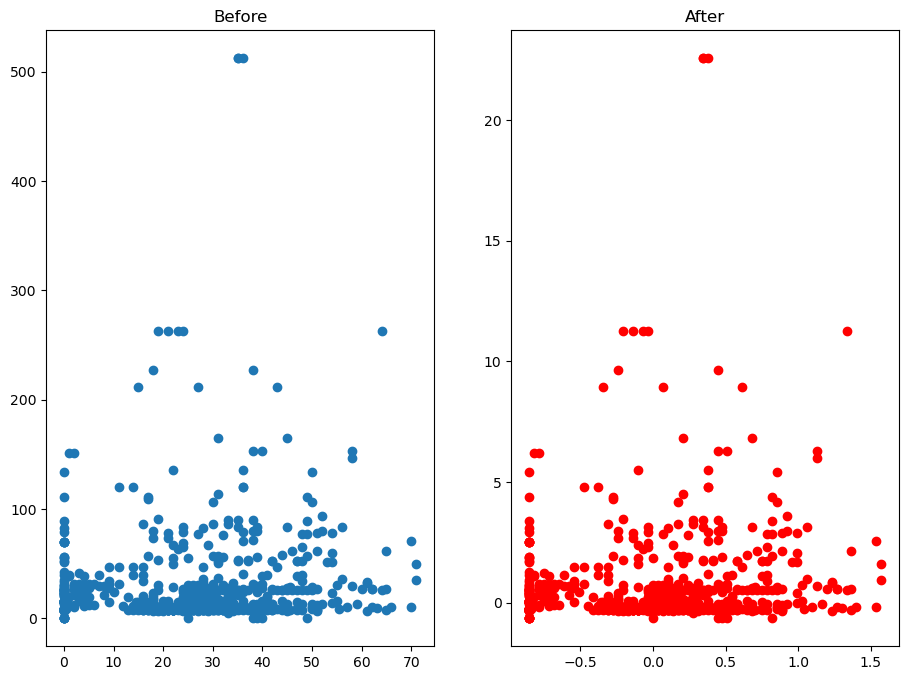

In [54]:
fig, (a1 , a2) = plt.subplots( ncols = 2 , figsize = (11,8))
a1.scatter(x_train["age"], x_train["fare"])
a1.set_title("Before")
a2.scatter(df_T3["age"],df_T3["fare"] ,  color = "red")
a2.set_title("After")